In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from datetime import datetime

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [ ]:
# First of all, save the length of the training and test data for use later
ntrain = train.shape[0]
ntest = test.shape[0]

# Also save the target value, as we will remove this
y_train = trainDF.SalePrice.values

# concatenate training and test data into all_data
all_data = pd.concat((trainDF, testDF), sort=False).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data shape: {}".format(all_data.shape))

In [3]:
train.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0


# Data cleaning

## Nan values

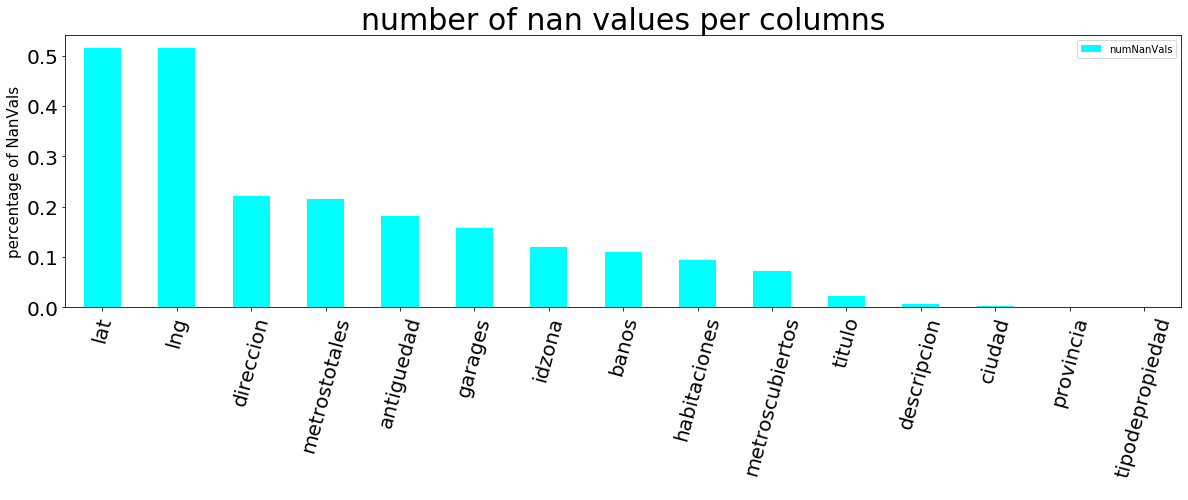

In [4]:
#create nan vals dataFrame
nanValDF = pd.DataFrame([train[x].isna().sum()/train.count()['id'] for x in train.columns[1:]], index = train.columns[1:], columns =['numNanVals'])

fig, ax = plt.subplots(figsize=[20,5])
#nanValDF.plot(kind = 'bar')
nanValDF[nanValDF.numNanVals > 0].sort_values(by='numNanVals', ascending = False).plot(kind='bar', ax = ax, cmap='cool')
plt.tick_params(labelsize=20)
plt.ylabel("percentage of NanVals", fontsize=15)
plt.xlabel(" ")
plt.title("number of nan values per columns", fontsize=30)


plt.legend()
plt.xticks(rotation = 75)
plt.show()

In [5]:
#dropping the texts collumns, the redudant ones,  and the one that have too many nan values.
cleanedData = train.drop(columns = ['lat','lng','direccion','titulo','descripcion','metrostotales','centroscomercialescercanos'])



In [6]:
cleanedData.index = cleanedData['id']
cleanedData.drop(columns = ['id'], inplace = True)

## Tipo de propiedad

In [7]:
train['tipodepropiedad'].drop_duplicates().dropna().values

array(['Apartamento', 'Casa en condominio', 'Casa', 'Terreno',
       'Terreno comercial', 'Local Comercial', 'Quinta Vacacional',
       'Oficina comercial', 'Edificio', 'Casa uso de suelo',
       'Local en centro comercial', 'Bodega comercial', 'Otros', 'Villa',
       'Duplex', 'Inmuebles productivos urbanos',
       'Departamento Compartido', 'Nave industrial', 'Rancho',
       'Terreno industrial', 'Huerta', 'Lote', 'Hospedaje', 'Garage'],
      dtype=object)

In [8]:
# need to be modified to match the words and not part of it
#tipo de propiedad, fill depending on title and descriptions, title > description
for x in train[train['tipodepropiedad'].isnull()][['titulo','descripcion','id']].values:
    if(type(x[1])!= str):
        x[1] = ""
    b = [y for y in train['tipodepropiedad'].drop_duplicates().dropna().values if y.lower() in (x[0].lower()+x[1].lower())]
    if (len(b)!=0):
        #use x[0] or the following or define priorities...
        #c = train[train['tipodepropiedad'].isin(b)]['tipodepropiedad'].mode()
        cleanedData.loc[x[2],'tipodepropiedad'] = b[0]
        
#We should drop the remaining values.

if(cleanedData['tipodepropiedad'].isnull().sum() == 0):
    print("Every values is fixed")
else:
    print((train['tipodepropiedad'].isnull().sum()-cleanedData['tipodepropiedad'].isnull().sum()),"values fixed")

39 values fixed


## provincia

In [9]:
#provincia, fill depending on title and descriptions, title > description
for x in train[train['provincia'].isnull()][['titulo','descripcion','id']].values:
    if(type(x[1])!= str):#get rid of nan descriptions
        x[1] = ""
    if(type(x[0])!=str):#get rid of nan titles
        x[0]=""
    b = [y for y in train['provincia'].drop_duplicates().dropna().values if y.lower() in (x[0].lower()+x[1].lower())]
    if (len(b)!=0):
        cleanedData.loc[x[2],'provincia'] = b[0]
        
#We should drop the remaining values.

if(cleanedData['provincia'].isnull().sum() == 0):
    print("Every values is fixed")
else:
    print("%.2f"%(cleanedData['provincia'].isnull().sum()/train['provincia'].isnull().sum()*100),"% of values fixed")        

98.06 % of values fixed


## Ciudad

In [10]:
#ciudad, fill depending on title and descriptions, title > description
for x in train[train['ciudad'].isnull()][['titulo','descripcion','id']].values:
    if(type(x[1])!= str):
        x[1] = ""
    if(type(x[0])!=str):#get rid of nan titles
        x[0]=""
    CiudadList = list(train['ciudad'].drop_duplicates().dropna().values)
    CiudadList.remove("Casas")
    b = [y for y in CiudadList if y.lower() in (x[0].lower()+x[1].lower())]
    if (len(b)!=0):
        cleanedData.loc[x[2],'ciudad'] = b[0]
#We should drop the remaining values.

if(cleanedData['ciudad'].isnull().sum() == 0):
    print("every values is fixed")
else:
    print("%.2f"%(cleanedData['ciudad'].isnull().sum()/train['ciudad'].isnull().sum()*100),"% of values fixed")        


51.61 % of values fixed


## metroscubiertos

In [11]:
#fill metroscubiertos knowing metrostotales as when we don't have one value we have the other.
a = train[train['metroscubiertos'].isnull()].count()['id']
b = train[train['metrostotales'].isnull()].count()['id']
c = train[train['metrostotales'].isnull() & train['metroscubiertos'].isnull()].count()['id']
print(a,b,c)
print("-> %.2f percents fillable"%((a-c)/a*100))

17400 51467 0
-> 100.00 percents fillable


In [12]:
a = train[['metroscubiertos','metrostotales']].drop_duplicates().values
cub = np.array([x[0] for x in a])
tot = np.array([x[1] for x in a])



In [13]:
%%time
for x in train[train['metroscubiertos'].isnull()][['metrostotales','id']].values:
    cleanedData.loc[x[1],'metroscubiertos'] = x[0]

if(cleanedData['metroscubiertos'].isnull().sum() == 0):
    print("Every values is fixed")
else:
    print("%.2f"%(cleanedData['metroscubiertos'].isnull().sum()/train['metroscubiertos'].isnull().sum()*100),"% of values fixed")    


Every values is fixed
CPU times: user 44.3 s, sys: 69.7 ms, total: 44.4 s
Wall time: 44.6 s


## Boolean Variables

In [14]:
#check the boolean values are only 0 or 1
for x in ['gimnasio','usosmultiples','escuelascercanas','piscina']:
    print(cleanedData[x].unique())

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


## IdZona

In [15]:
#fill idzona knowing metrostotales as when we don't have one value we have the other.
a = train[train['idzona'].isnull()].count()['id']
c = train[train['idzona'].isnull() & train['lat'].isnull()].count()['id']
print(a,c)
print("-> %.2f percents fillable"%((a-c)/a*100))

28621 17176
-> 39.99 percents fillable


In [16]:
def getIdZona(lat,lng):
    return(0)

In [17]:
for x in train[train['idzona'].isnull()][['lat','lng','id']].dropna().values:
    print(x)
    cleanedData.loc[x[2],'idzona'] = getIdZona(x[0],x[1])
    break

[ 1.95165831e+01 -9.92560284e+01  2.01923000e+05]


## Garages

In [18]:
#garage we can do some text analysis too.
train['garages'].unique(),train['garages'].mode()

(array([ 1.,  2., nan,  0.,  3.]), 0    2.0
 dtype: float64)

In [19]:
%%time
#grarges, fill on the mention of a garage in title and description.
for x in train[train['garages'].isnull()][['titulo','descripcion','id']].values:
    if(type(x[1])!= str):
        x[1] = ""
    if(type(x[0])!=str):#get rid of nan titles
        x[0]=""
    
    b = [y for y in ["garage","garages"] if y.lower() in (x[0].lower()+x[1].lower())]
    if (len(b)!=0):
        if("garages" in b):#fill with the mode
            cleanedData.loc[x[2],'garages'] = 2.0
        else:
            cleanedData.loc[x[2],'garages'] = 1.0
    else:#-> no garages
        cleanedData.loc[x[2],'garages'] = 0.
        
if(cleanedData['garages'].isnull().sum() == 0):
    print("Every values is fixed")
else:
    print("%.2f"%(cleanedData['garages'].isnull().sum()/train['garages'].isnull().sum()*100),"% of values fixed")    
#other cases: no garages mentionened anywhere -> no garages
#cleanedData[cleanedData['garages'].isnull()].loc[:,'garages'].fillna(0.,inplace = True)        
#this deals with every missing value.

Every values is fixed
CPU times: user 1min 16s, sys: 180 ms, total: 1min 16s
Wall time: 1min 17s


## banos

In [20]:
#garage we can do some text analysis too.
train['banos'].unique(),train['banos'].mode()

(array([ 2.,  1.,  3., nan,  4.]), 0    2.0
 dtype: float64)

In [21]:
%%time
#Same approach as garages.
for x in train[train['banos'].isnull()][['titulo','descripcion','id']].values:
    if(type(x[1])!= str):
        x[1] = ""
    if(type(x[0])!=str):#get rid of nan titles
        x[0]=""
    
    b = [y for y in ["bano","banos"] if y.lower() in (x[0].lower()+x[1].lower())]
    if (len(b)!=0):
        if("banos" in b):#fill with the mode
            cleanedData.loc[x[2],'banos'] = 2.0
        else:
            cleanedData.loc[x[2],'banos'] = 1.0
    else:
        cleanedData.loc[x[2],'banos'] = 0.
        
if(cleanedData['banos'].isnull().sum() == 0):
    print("Every values is fixed")
else:
    print("%.2f"%(cleanedData['banos'].isnull().sum()/train['banos'].isnull().sum()*100),"% of values fixed")

Every values is fixed
CPU times: user 54.4 s, sys: 423 ms, total: 54.8 s
Wall time: 55 s


## habitaciones

In [22]:
#garage we can do some text analysis too.
train['habitaciones'].unique(),train['habitaciones'].mode()[0]

(array([ 2.,  3.,  4., nan,  5.,  1.,  9.,  7., 10.,  6.,  8.]), 3.0)

In [23]:
%%time
#Same approach as garages.
for x in train[train['habitaciones'].isnull()][['titulo','descripcion','id']].values:
    if(type(x[1])!= str):
        x[1] = ""
    if(type(x[0])!=str):#get rid of nan titles
        x[0]=""
    
        b = [y for y in ["habitacion","habitaciones","3 habitaciones","2 habitaciones",
                         "1 habitacion","4 habitaciones","5 habitaciones","6 habitaciones",
                        "7 habitaciones","8 habitaciones","9 habitaciones","10 habitaciones"] if y.lower() in (x[0].lower()+x[1].lower())]
    if (len(b)!=0):#if there is someting detected
        if (len(b)>2):
            #print(b)
            for i in range(10,1,-1):
                    if(str(i)+" habitaciones" in b):
                        cleanedData.loc[x[2],'habitaciones'] = i
                        break
        elif (len(b)==2):#habitaciones -> mode 
            cleanedData.loc[x[2],'habitaciones'] = train['habitaciones'].mode()[0]
        else:#habitacion -> 1
            cleanedData.loc[x[2],'habitaciones'] = 1
            
            
print("%.2f"%(cleanedData['habitaciones'].isnull().sum()/train['habitaciones'].isnull().sum()*100),"% of values fixed")

93.11 % of values fixed
CPU times: user 3.13 s, sys: 0 ns, total: 3.13 s
Wall time: 3.14 s


## Antiguedad

In [24]:
print(train['antiguedad'].sort_values().unique())
print('mode = %.2f'%train['antiguedad'].mode().values[0], 'mean = %.2f'%train['antiguedad'].mean(),'median = %.2f'%train['antiguedad'].median())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 74. 75. 76. 77. 79. 80. nan]
mode = 0.00 mean = 8.12 median = 5.00


In [25]:
import re
#re.findall (r'(antiguedad )[\d]*', x[1])
re.findall (r'\b\d+\b', x[1])
a = re.findall (r'\bantiguedad \d+', "antiguedad 9123")
b = re.findall (r'\d+\b antiguedad', "123 antiguedad 122133")
if (len(a)>0):
    print([int(s) for s in a[0].split() if s.isdigit()][0])
if(len(b)>0):
    print([int(s) for s in b[0].split() if s.isdigit()][0])

9123
123


In [26]:
u = "enta de casa en . la loma. bonita casa de 96 m2 de terreno y 92.1 m2 de construcción, 3 años de antigüedad. cuenta con 3 recámaras, principal con closet, sala-comedor, cocina integral, amplio jardín con patio de servicio, 1.5 baños, 1 estacionamiento. se ubica a unos metros de prolongación blvd. bernardo quintana, av. de la luz y libramiento sur-poniente, cerca de campo deportivo, centros comerciales y prestigiosas escuelas como el colegio helen parkhurst. acepto créditos fovissste, infonavit, bancarios, etc."

In [27]:
import re
#re.findall (r'(antiguedad )[\d]*', x[1])
re.findall (r'\b\d+\b', x[1])
e = "años"
a = re.findall (r'\b'+e+' \d+', u)
b = re.findall (r'\d+\b '+e+'', u)
if (len(a)>0):
    print([int(s) for s in a[0].split() if s.isdigit()][0])
if(len(b)>0):
    print([int(s) for s in b[0].split() if s.isdigit()][0])

3


In [28]:
#Same approach as garages.
for x in train[train['antiguedad'].isnull()][['titulo','descripcion','id']].values:
    if(type(x[1])!= str):
        x[1] = ""
    if(type(x[0])!=str):#get rid of nan titles
        x[0]=""
    
        #b = [y for y in [str(x) for x in np.arange(100)] if y.lower() in (x[0].lower()+x[1].lower())]
        b = [y for y in ["antiguedad"," años ","antigûedad",'antigüedad'] if y.lower() in (x[0].lower()+x[1].lower())]
        if(len(b)!= 0):
            #print("\n",b)
            #print(x[1])
            toFind = b[0]
            #print('\d+\b'+" "+str(toFind))
            #a = re.findall (r'\b'+str(toFind)+" "+'\d+', (x[0].lower()+x[1].lower()))
            desc = (x[0].lower()+x[1].lower())
            wordToFind = b[0].strip()
            a = re.findall (r'\b'+wordToFind+' \d+', desc)
            b = re.findall (r'\d+\b '+wordToFind+'', desc)
            if (len(a)>0):#if the number is after the word
                #print("----------->",wordToFind,[int(s) for s in a[0].split() if s.isdigit()][0])
                cleanedData.loc[x[2],'antiguedad'] = [int(s) for s in a[0].split() if s.isdigit()][0]
            if(len(b)>0):#if the number if before the word
                #print("----------->",[int(s) for s in b[0].split() if s.isdigit()][0],wordToFind)
                cleanedData.loc[x[2],'antiguedad'] = [int(s) for s in b[0].split() if s.isdigit()][0]
        #break
        
if(cleanedData['antiguedad'].isnull().sum() == 0):
    print("Every values is fixed")
else:
    print((train['antiguedad'].isnull().sum()-cleanedData['antiguedad'].isnull().sum()),"values fixed")

3 values fixed


## Check we cleaned well

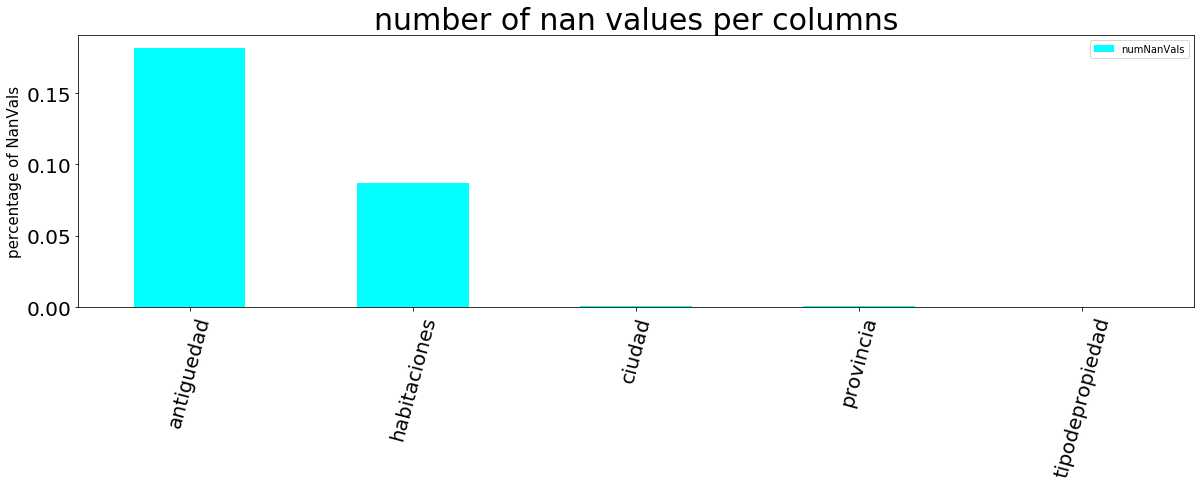

In [331]:
#create nan vals dataFrame
#check what has been cleaned.
nanValDF = pd.DataFrame([cleanedData[x].isna().sum()/len(cleanedData) for x in cleanedData.columns[1:]], index = cleanedData.columns[1:], columns =['numNanVals'])

fig, ax = plt.subplots(figsize=[20,5])
#nanValDF.plot(kind = 'bar')
nanValDF[nanValDF.numNanVals > 0].sort_values(by='numNanVals', ascending = False).plot(kind='bar', ax = ax, cmap='cool')
plt.tick_params(labelsize=20)
plt.ylabel("percentage of NanVals", fontsize=15)
plt.xlabel(" ")
plt.title("number of nan values per columns", fontsize=30)


plt.legend()
plt.xticks(rotation = 75)
plt.show()
#nanValDF

In [332]:
#remove idzona ?
columnsToDrop = ['idzona','antiguedad','habitaciones']
#drop idzona because too many nan values AND hard to use.
for col in columnsToDrop:
    if (col in cleanedData.columns):
        cleanedData = cleanedData.drop(columns = [col])
    print("Dropped",col)


Dropped idzona
Dropped antiguedad
Dropped habitaciones


In [333]:
#drop nan rows
cleanedData = cleanedData.dropna()
cleanedData.isna().sum().max()

0

In [31]:
#save the cleaned data
cleanedData.to_csv("cleanedData.csv")

In [330]:
#load cleaned data
cleanedData = pd.read_csv("./cleanedData.csv")

# Data Tranformation

exponnorm , foldnorm, gennorm, halfnorm, halfgennorm, lognorm, norminvgauss, powerlognorm, powernorm, skewnorm,
truncnorm

test : 
- shapiro(x)
- skewtest(x)
- kurtosistest(x)
- normaltest(x)

### Casting columns types

In [334]:
cleanedData = cleanedData.astype({'garages': 'int8',"gimnasio" : "int8","usosmultiples":"int8","piscina":'int8',"escuelascercanas":'int8',"metroscubiertos":'int32'})

### Numerical variables

In [335]:
cleanedData.columns

Index(['id', 'tipodepropiedad', 'ciudad', 'provincia', 'garages', 'banos',
       'metroscubiertos', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'precio'],
      dtype='object')

#### fecha

In [336]:
#Functions to encode time value.
functionTime1 = lambda x :(datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
functionTimeMin = lambda t : (int(t.year*525600+t.month*43800+t.day*1440+t.minute*1))
functionTimeSec = lambda t : (int(t.year*3.154e+7+t.month*2.628e+6+t.day*86400+t.minute*60+t.second))
functionTimeDay = lambda t : (int(t.year*365+t.month*31+t.day))
functionTimeMonth = lambda t : (int(t.year*12+t.month))

#first pass it to time format
cleanedData['fecha'].apply(func = (lambda x :(datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
#convert fecha to number of (seconds or month or days or...)
cleanedData['fecha'] = cleanedData['fecha'].apply(func = (lambda x: functionTimeSec(functionTime1(x))))
#then min max scale it
#cleanedData['fecha'] = (cleanedData['fecha']-cleanedData['fecha'].min())/cleanedData['fecha'].max()

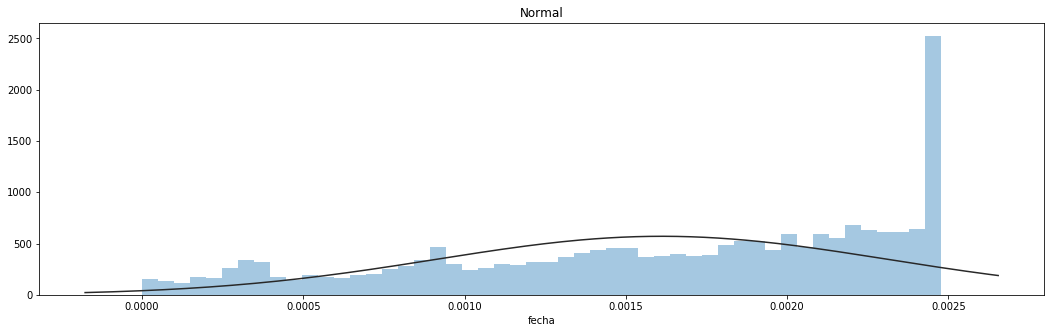

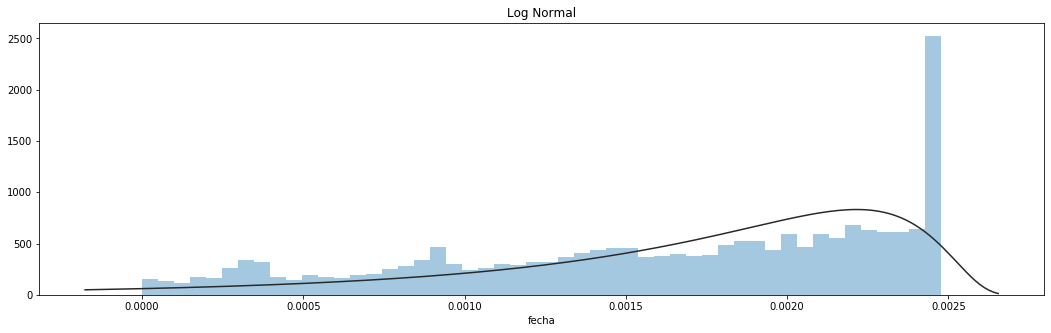

In [337]:
y = (cleanedData['fecha']-cleanedData['fecha'].min())/cleanedData['fecha'].max()

plt.figure(2, figsize = [18,5]); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3, figsize = [18,5]); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.norminvgauss)
plt.show()

In [338]:
cleanedData['fecha'] = (cleanedData['fecha']-cleanedData['fecha'].min())/(cleanedData['fecha'].max()-cleanedData['fecha'].min())
a, b, loc, scale = stats.norminvgauss.fit(cleanedData['fecha'])
cleanedData['fecha'] = stats.norminvgauss.pdf(cleanedData['fecha'], a, b, loc, scale)


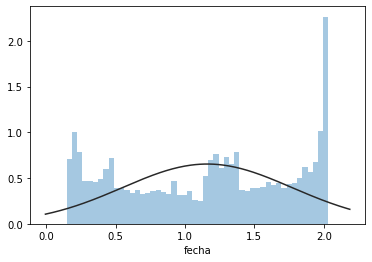

In [339]:
sns.distplot(cleanedData['fecha'], kde=False, fit=stats.norm)
plt.show()

#### Precio

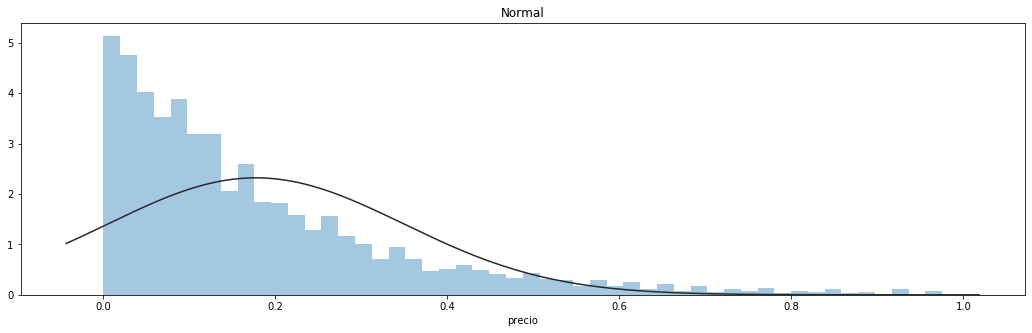

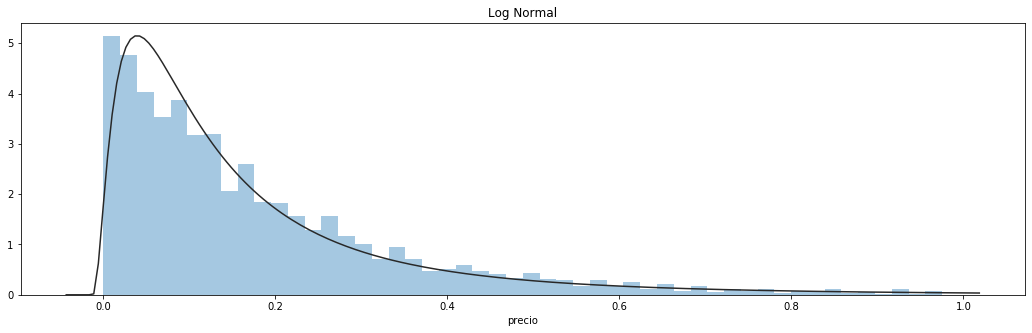

In [340]:
y = (cleanedData['precio']-cleanedData['precio'].min())/cleanedData['precio'].max()

plt.figure(2, figsize = [18,5]); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3, figsize = [18,5]); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.show()

In [341]:
#log + standardization
cleanedData['precio'] = np.log(cleanedData['precio'])
cleanedData['precio'] = (cleanedData['precio']-cleanedData['precio'].min())/\
                            (cleanedData['precio'].max()-cleanedData['precio'].min())

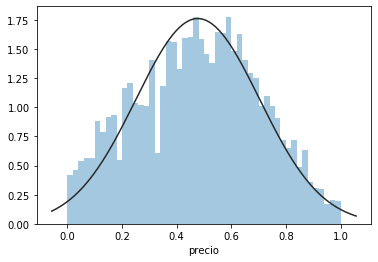

In [342]:
sns.distplot(cleanedData['precio'], kde=False, fit=stats.norm)
plt.show()

#### Metros cubiertos

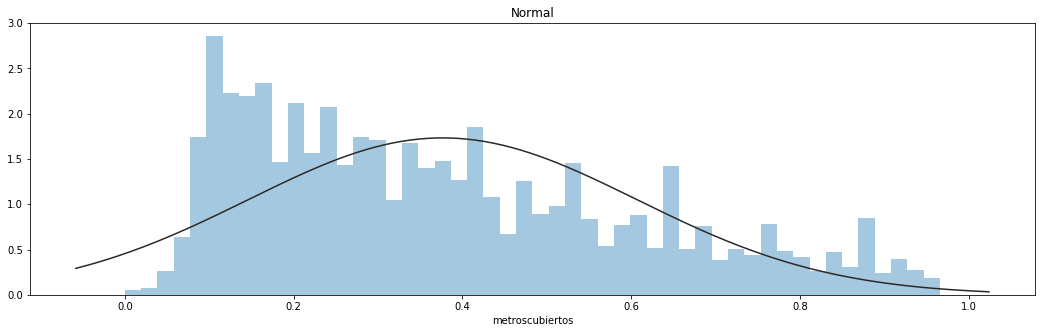

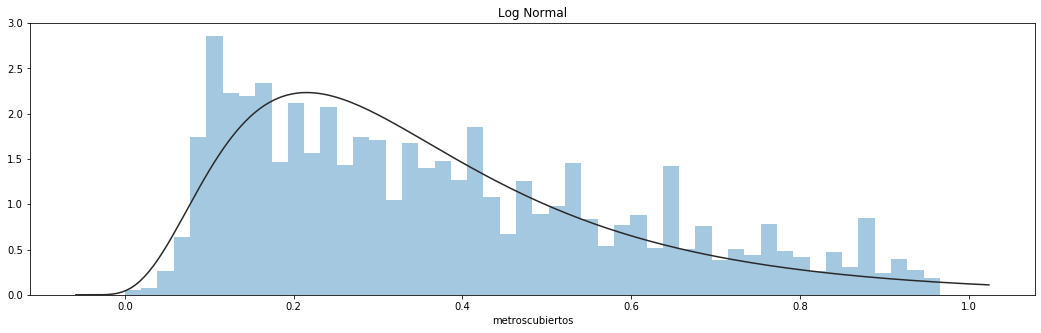

In [343]:
y = (cleanedData['metroscubiertos']-cleanedData['metroscubiertos'].min())/cleanedData['metroscubiertos'].max()
plt.figure(2, figsize = [18,5]); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3, figsize = [18,5]); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.show()

In [344]:
#log + standardization
cleanedData['metroscubiertos'] = np.log(cleanedData['metroscubiertos'])
cleanedData['metroscubiertos'] = (cleanedData['metroscubiertos']-cleanedData['metroscubiertos'].min())/\
                                (cleanedData['metroscubiertos'].max()-cleanedData['metroscubiertos'].min())

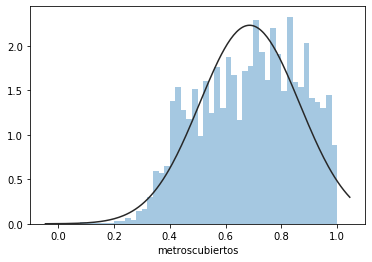

In [345]:
sns.distplot(cleanedData['metroscubiertos'], kde=False, fit=stats.norm)
plt.show()

#### banos

In [346]:
#only min max scaler

cleanedData['banos'] = (cleanedData['banos']-cleanedData['banos'].min())/\
                                (cleanedData['banos'].max()-cleanedData['banos'].min())

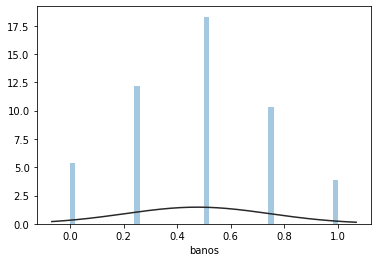

In [347]:
sns.distplot(cleanedData['banos'], kde=False, fit=stats.norm)
plt.show()

#### garages

In [348]:
#only min max scaler

cleanedData['garages'] = (cleanedData['garages']-cleanedData['garages'].min())/\
                                (cleanedData['garages'].max()-cleanedData['garages'].min())

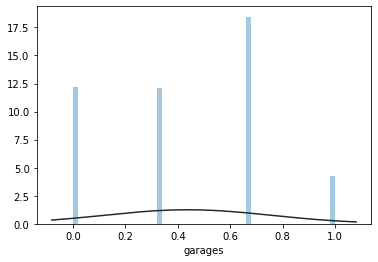

In [349]:
sns.distplot(cleanedData['garages'], kde=False, fit=stats.norm)
plt.show()

### categorical variables

_For those variables there is no need for transformations other than encoding._

#### ciudad , tipodepropiedad, provincia - 1 hot encoding

In [350]:
cleanedData.columns

Index(['id', 'tipodepropiedad', 'ciudad', 'provincia', 'garages', 'banos',
       'metroscubiertos', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'precio'],
      dtype='object')

In [351]:
df = pd.concat([cleanedData,pd.get_dummies(cleanedData['ciudad'], prefix='cd')],axis=1)
# now drop the original column
df.drop(['ciudad'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['tipodepropiedad'], prefix='tp')],axis=1)
# now drop the column
df.drop(['tipodepropiedad'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['provincia'], prefix='prov')],axis=1)
# now drop the original column
df.drop(['provincia'],axis=1, inplace=True)
df.columns

Index(['id', 'garages', 'banos', 'metroscubiertos', 'fecha', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas', 'precio',
       ...
       'prov_Quintana Roo', 'prov_San luis Potosí', 'prov_Sinaloa',
       'prov_Sonora', 'prov_Tabasco', 'prov_Tamaulipas', 'prov_Tlaxcala',
       'prov_Veracruz', 'prov_Yucatán', 'prov_Zacatecas'],
      dtype='object', length=941)

#### binary variables 
- gimnasio
- usosmultiples
- piscina
- escuelascercanas

In [352]:
cleanedData.columns

Index(['id', 'tipodepropiedad', 'ciudad', 'provincia', 'garages', 'banos',
       'metroscubiertos', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'precio'],
      dtype='object')

In [353]:
df = pd.concat([df,pd.get_dummies(df['gimnasio'], prefix='gi')],axis=1)
# now drop the original column
df.drop(['gimnasio'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['usosmultiples'], prefix='usm')],axis=1)
# now drop the original column
df.drop(['usosmultiples'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['piscina'], prefix='pi')],axis=1)
# now drop the original column
df.drop(['piscina'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['escuelascercanas'], prefix='es')],axis=1)
# now drop the original column
df.drop(['escuelascercanas'],axis=1, inplace=True)
df.columns

Index(['id', 'garages', 'banos', 'metroscubiertos', 'fecha', 'precio',
       'cd_Abalá', 'cd_Abasolo', 'cd_Abejones', 'cd_Acajete',
       ...
       'prov_Yucatán', 'prov_Zacatecas', 'gi_0', 'gi_1', 'usm_0', 'usm_1',
       'pi_0', 'pi_1', 'es_0', 'es_1'],
      dtype='object', length=945)

In [356]:
quantitative = list(cleanedData.drop(columns=['id']).select_dtypes('number').columns)
qualitative = cleanedData.select_dtypes('object').columns.values
#qualitativeImportant = ['tipodepropiedad','provincia']

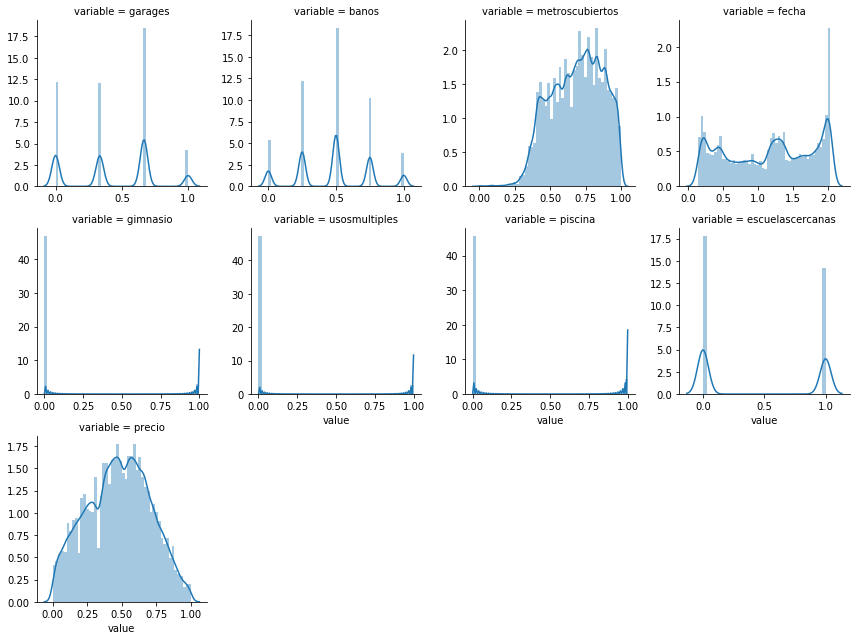

In [357]:
f = pd.melt(cleanedData, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")